<a href="https://colab.research.google.com/github/SalmanAlfarizy26/histogram-proyeksi/blob/main/percobaan_Histogram_Cropping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving satu.png to satu.png


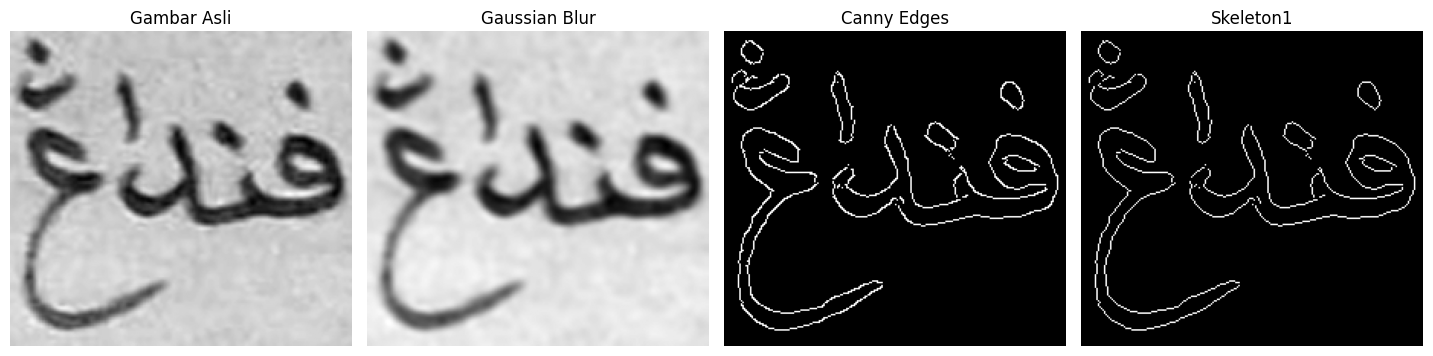

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os # Baris ini ditambahkan
from skimage.morphology import skeletonize

from google.colab import files
uploaded = files.upload()

# === 1. Load Gambar ===
image_path = "satu.png"  # Sesuaikan dengan path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Periksa apakah gambar berhasil dibaca
if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Resize Gambar (Opsional) ===
image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2), interpolation=cv2.INTER_CUBIC)

# === 3. Preprocessing ===
blurred = cv2.GaussianBlur(image, (9, 9), 0)

# === 4. Canny Edge Detection ===
edges = cv2.Canny(blurred, threshold1=50, threshold2=10)

# === 5. Konversi ke Biner ===
_, binary = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)

# === 6. Skeletonization ===
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)


# === 8. Tampilkan Hasil ===
plt.figure(figsize=(18, 5))
plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton1")
plt.axis("off")

plt.tight_layout()
plt.show()


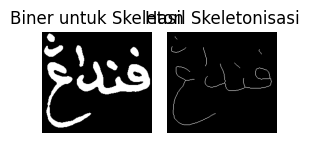

In [ ]:
# === 5. Konversi ke Biner LANGSUNG dari blurred image
_, binary_for_skeleton = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY_INV)

# === 6. Skeletonization dari citra biner asli (bukan dari edge)
skeleton = skeletonize(binary_for_skeleton > 0)
skeleton = (skeleton * 255).astype(np.uint8)

plt.subplot(1, 5, 4)
plt.imshow(binary_for_skeleton, cmap="gray")
plt.title("Biner untuk Skeleton")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(skeleton, cmap="gray")
plt.title("Hasil Skeletonisasi")
plt.axis("off")

plt.tight_layout()
plt.show()

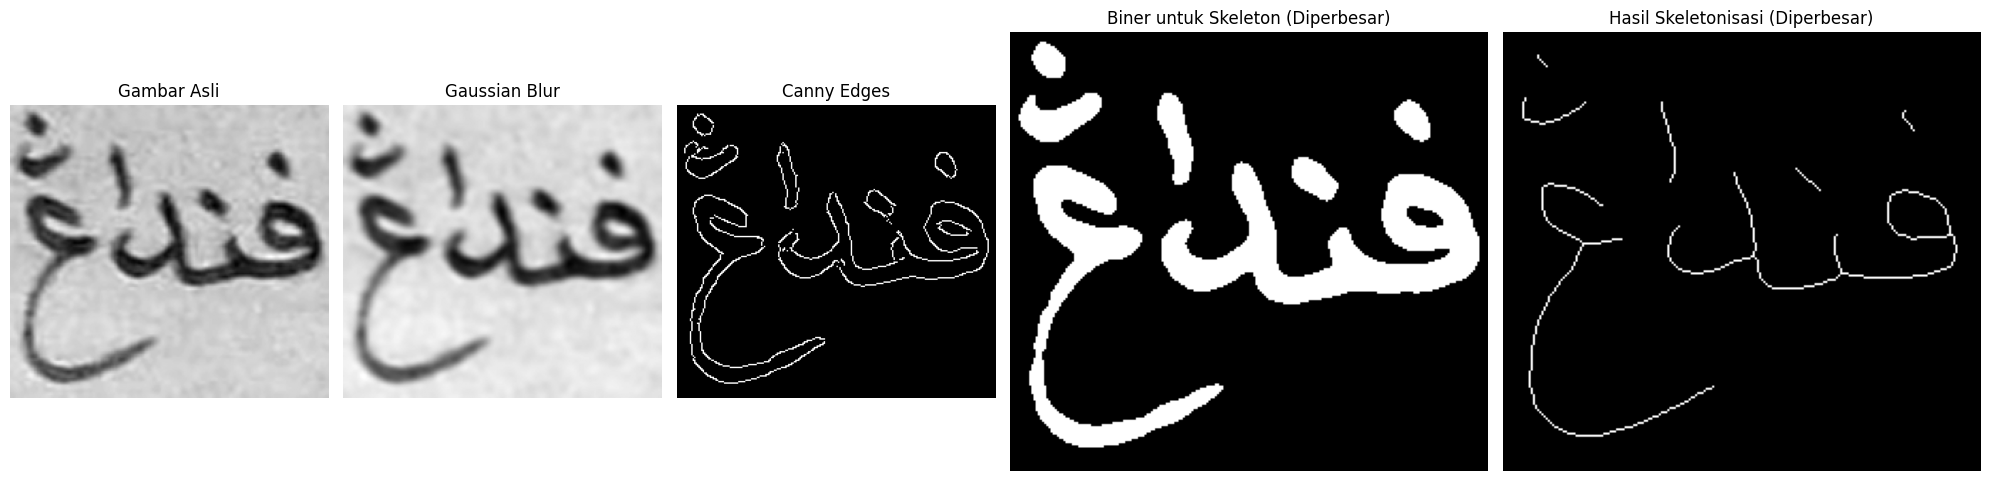

In [ ]:
# ===== PERBAIKAN DISINI =====
# 1. Perbesar ukuran figure (width, height)
plt.figure(figsize=(20, 6))  # Sebelumnya (18,5)

# 2. Atur lebar relatif subplot (beri lebih banyak ruang untuk gambar 4 & 5)
width_ratios = [1, 1, 1, 1.5, 1.5]  # Subplot 4 & 5 lebih lebar
gs = plt.GridSpec(1, 5, width_ratios=width_ratios)

# Subplot 1-3 (gambar asli, blur, canny)
plt.subplot(gs[0])
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(gs[1])
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(gs[2])
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

# Subplot 4 & 5 (biner & skeleton - diperbesar)
plt.subplot(gs[3])  # Lebar 1.5x dari subplot biasa
plt.imshow(binary_for_skeleton, cmap="gray")
plt.title("Biner untuk Skeleton (Diperbesar)")
plt.axis("off")

plt.subplot(gs[4])  # Lebar 1.5x dari subplot biasa
plt.imshow(skeleton, cmap="gray")
plt.title("Hasil Skeletonisasi (Diperbesar)")
plt.axis("off")

plt.tight_layout()
plt.show()

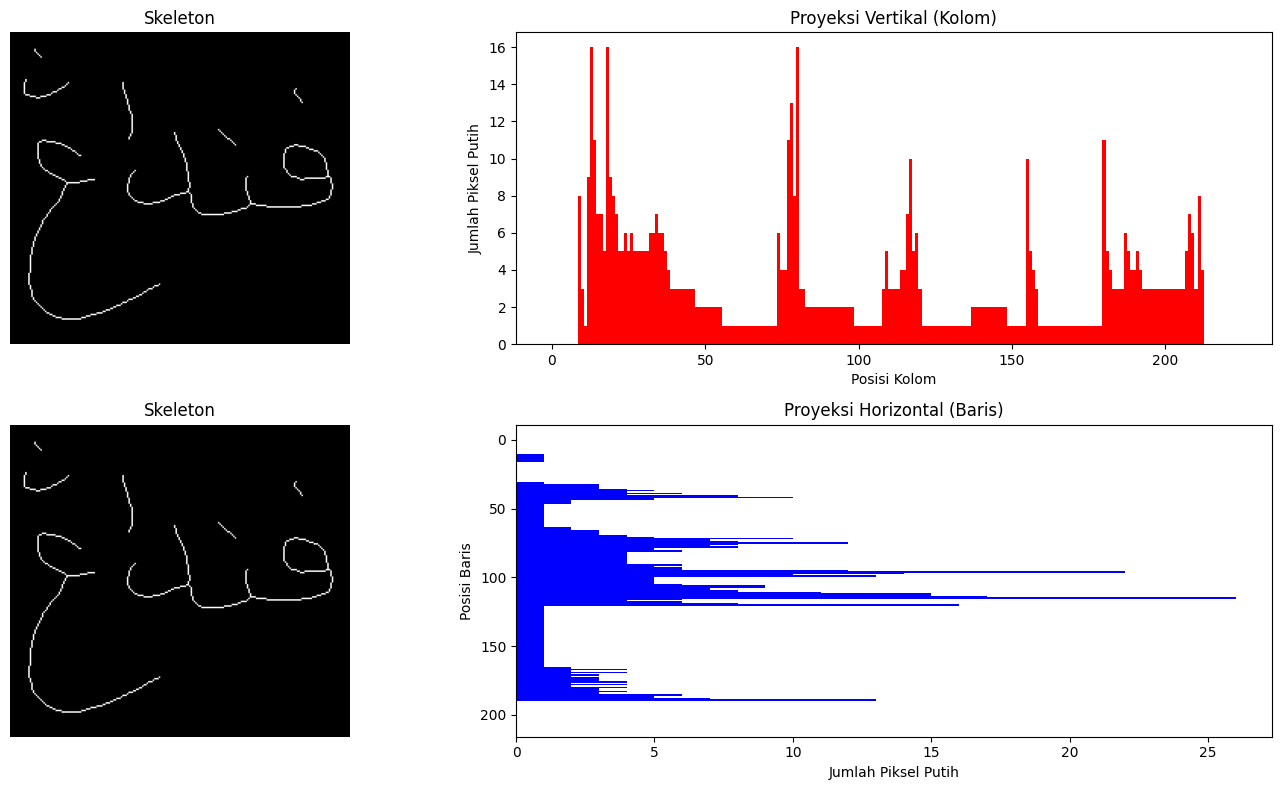

In [ ]:
# ===== HISTOGRAM PROYEKSI =====
# Hitung proyeksi vertikal (jumlah piksel putih per kolom)
vertical_projection = np.sum(skeleton == 255, axis=0)

# Hitung proyeksi horizontal (jumlah piksel putih per baris)
horizontal_projection = np.sum(skeleton== 255, axis=1)

# ===== VISUALISASI HISTOGRAM =====
plt.figure(figsize=(15, 8))

# Subplot 1: Skeleton + Proyeksi Vertikal
plt.subplot(2, 2, 1)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.bar(range(len(vertical_projection)), vertical_projection, width=1.0, color='red')
plt.title("Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Subplot 3: Skeleton + Proyeksi Horizontal
plt.subplot(2, 2, 3)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.barh(range(len(horizontal_projection)), horizontal_projection, height=1.0, color='blue')
plt.title("Proyeksi Horizontal (Baris)")
plt.xlabel("Jumlah Piksel Putih")
plt.ylabel("Posisi Baris")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

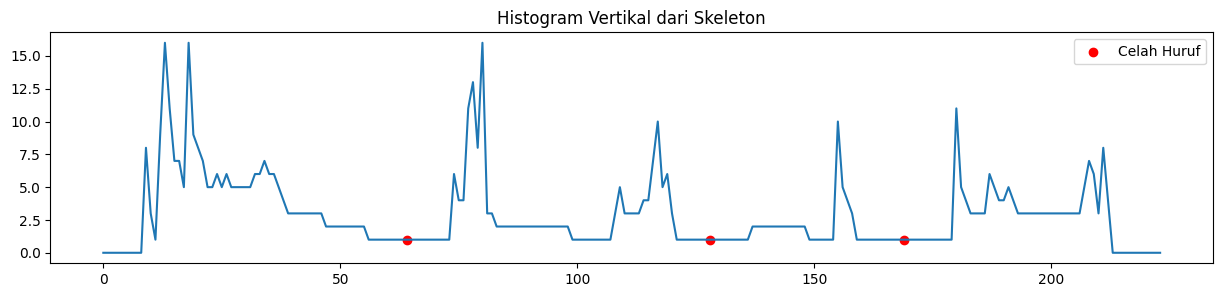

Tidak cukup titik di kolom celah.


In [ ]:
# ===============================
# Setelah plt.show() kode kamu
# ===============================

import numpy as np
import math
from scipy.signal import find_peaks

# Pastikan skeleton dalam format biner
_, binary_skel = cv2.threshold(skeleton, 127, 255, cv2.THRESH_BINARY)

# Ambil koordinat titik skeleton
points = np.column_stack(np.where(binary_skel == 255))

# Buat histogram proyeksi vertikal
hist_col = np.sum(binary_skel == 255, axis=0)

# Cari lembah (indikasi celah antar huruf)
lembah_idx, _ = find_peaks(-hist_col, distance=40, prominence=8)

# Visualisasi histogram
plt.figure(figsize=(15, 3))
plt.plot(hist_col)
plt.scatter(lembah_idx, hist_col[lembah_idx], color='red', label='Celah Huruf')
plt.title("Histogram Vertikal dari Skeleton")
plt.legend()
plt.show()

# Ambil satu celah (misal lembah pertama)
if len(lembah_idx) >= 1:
    col = lembah_idx[0]
    titik_di_kolom = points[points[:, 1] == col]  # Filter titik berdasarkan kolom

    if len(titik_di_kolom) >= 2:
        top = tuple(titik_di_kolom[np.argmin(titik_di_kolom[:, 0])][::-1])
        bottom = tuple(titik_di_kolom[np.argmax(titik_di_kolom[:, 0])][::-1])

        dx = bottom[0] - top[0]
        dy = bottom[1] - top[1]
        angle_rad = math.atan2(dy, dx)
        angle_deg = math.degrees(angle_rad) % 180

        print(f"Sudut kemiringan di celah huruf (kolom {col}): {angle_deg:.2f}°")

        # Visualisasi garis pada skeleton
        skeleton_rgb = cv2.cvtColor(binary_skel, cv2.COLOR_GRAY2BGR)
        cv2.line(skeleton_rgb, top, bottom, (0, 255, 255), 2)  # Garis kuning

        plt.figure(figsize=(8, 6))
        plt.imshow(skeleton_rgb)
        plt.title(f"Garis Kemiringan: {angle_deg:.2f}°")
        plt.axis("off")
        plt.show()
    else:
        print("Tidak cukup titik di kolom celah.")
else:
    print("Tidak ditemukan lembah (celah) antar huruf.")


✅ Sudut kemiringan di celah (kolom 70): 153.43°


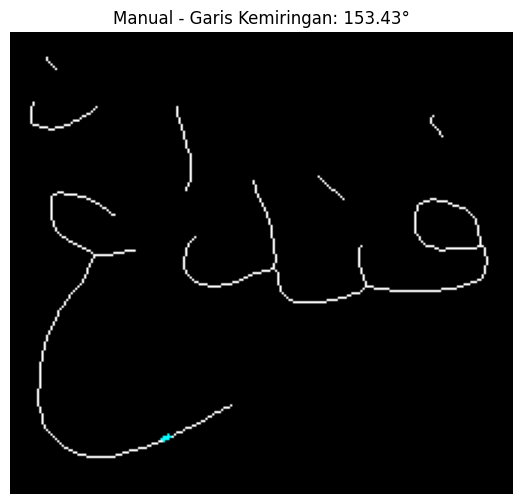

In [ ]:
# =============== LANJUTAN DARI KODEMU ===============
# PILIH KOLOM MANUAL (hasil pengamatan)
col_manual = 70  # Ganti ini sesuai pengamatan celah antara huruf Dal dan Ain

# Ambil titik skeleton di kolom itu ± toleransi
toleransi = 2  # Bisa juga coba 2
mask = (points[:, 1] >= col_manual - toleransi) & (points[:, 1] <= col_manual + toleransi)
titik_di_kolom = points[mask]

if len(titik_di_kolom) >= 2:
    top = tuple(titik_di_kolom[np.argmin(titik_di_kolom[:, 0])][::-1])
    bottom = tuple(titik_di_kolom[np.argmax(titik_di_kolom[:, 0])][::-1])

    dx = bottom[0] - top[0]
    dy = bottom[1] - top[1]
    angle_rad = math.atan2(dy, dx)
    angle_deg = math.degrees(angle_rad) % 180

    print(f"✅ Sudut kemiringan di celah (kolom {col_manual}): {angle_deg:.2f}°")

    # Visualisasi garis kuning
    skeleton_rgb = cv2.cvtColor(binary_skel, cv2.COLOR_GRAY2BGR)
    cv2.line(skeleton_rgb, top, bottom, (0, 255, 255), 2)  # Garis kuning

    plt.figure(figsize=(8, 6))
    plt.imshow(skeleton_rgb)
    plt.title(f"Manual - Garis Kemiringan: {angle_deg:.2f}°")
    plt.axis("off")
    plt.show()
else:
    print("❌ Tidak cukup titik untuk hitung sudut di kolom manual.")


Saving satu.png to satu.png


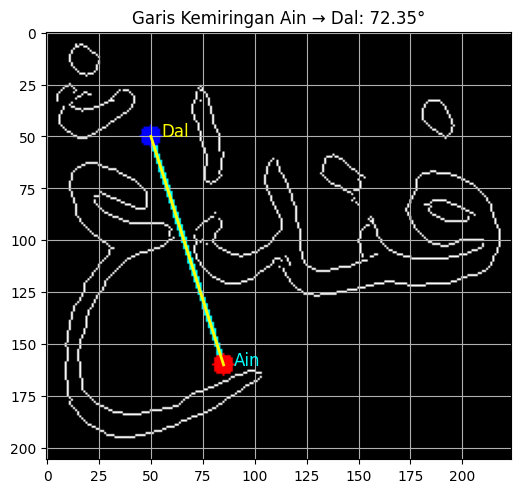

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import files
from skimage.morphology import skeletonize

# Upload gambar
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load dan proses gambar
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)
blurred = cv2.GaussianBlur(image, (9, 9), 0)
edges = cv2.Canny(blurred, 50, 10)
_, binary = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# Konversi ke RGB untuk anotasi
skeleton_rgb = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2BGR)

# Manual pilih 2 titik (ganti sesuai kebutuhanmu)
# Format: (x, y)
ain = (85, 160)
dal = (50, 50)

# Hitung sudut kemiringan
dx = dal[0] - ain[0]
dy = dal[1] - ain[1]
angle_rad = math.atan2(dy, dx)
angle_deg = math.degrees(angle_rad) % 180

# Gambar garis dan anotasi
output = skeleton_rgb.copy()
cv2.line(output, ain, dal, (0, 255, 255), 2)
cv2.circle(output, ain, 5, (255, 0, 0), -1)
cv2.circle(output, dal, 5, (0, 0, 255), -1)


# Tambah label titik
plt.figure(figsize=(6, 6))
plt.imshow(output)
plt.text(ain[0]+5, ain[1], 'Ain', color='cyan', fontsize=12)
plt.text(dal[0]+5, dal[1], 'Dal', color='yellow', fontsize=12)

# Tambah garis bantu & grid
plt.plot([ain[0], dal[0]], [ain[1], dal[1]], color='yellow', linewidth=2)
plt.title(f"Garis Kemiringan Ain → Dal: {angle_deg:.2f}°")
plt.grid(True)
plt.axis('on')
plt.show()


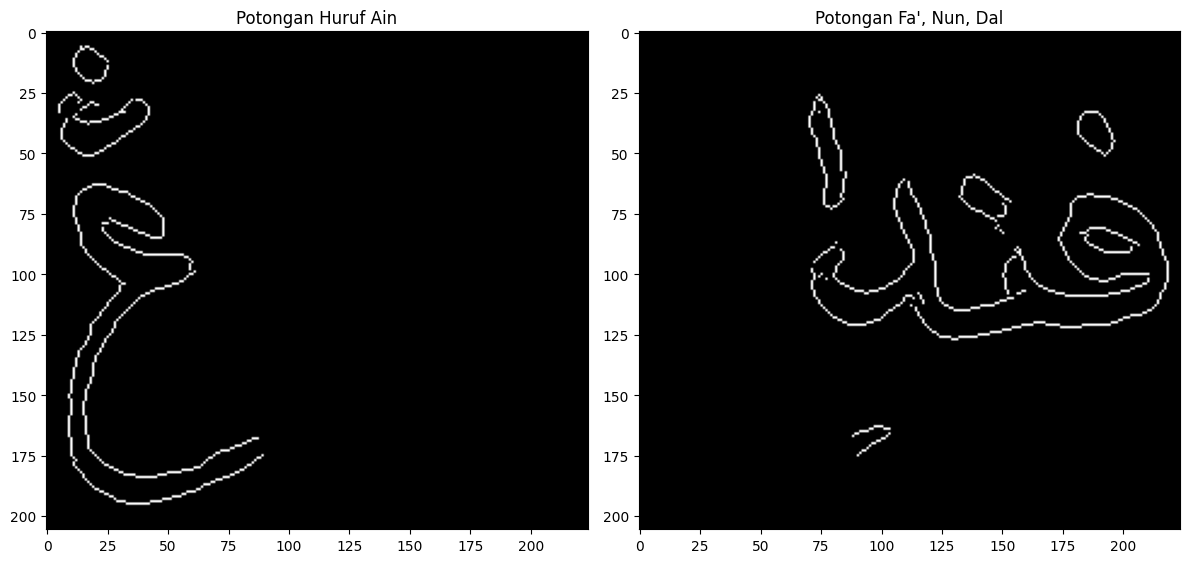

In [ ]:
# === MASKING SISI KIRI DAN KANAN DARI GARIS ===

# Buat vektor arah dari Ain ke Dal
v = np.array([dal[0] - ain[0], dal[1] - ain[1]])
normal = np.array([-v[1], v[0]])  # Rotasi 90 derajat
normal = normal / np.linalg.norm(normal)

# Mask sisi KIRI (misalnya huruf Ain)
mask_ain = np.zeros_like(skeleton, dtype=np.uint8)
# Mask sisi KANAN (misalnya Fa', Nun, Dal)
mask_fnd = np.zeros_like(skeleton, dtype=np.uint8)

for y in range(skeleton.shape[0]):
    for x in range(skeleton.shape[1]):
        p = np.array([x - ain[0], y - ain[1]])
        side = np.dot(p, normal)
        if side < 0:
            mask_ain[y, x] = 255  # sisi kiri garis
        else:
            mask_fnd[y, x] = 255  # sisi kanan garis

# Terapkan masking ke skeleton
ain_result = cv2.bitwise_and(skeleton, skeleton, mask=mask_ain)
fnd_result = cv2.bitwise_and(skeleton, skeleton, mask=mask_fnd)

# === VISUALISASI HASIL POTONGAN ===
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(ain_result, cmap='gray')
plt.title("Potongan Huruf Ain")

plt.subplot(1, 2, 2)
plt.imshow(fnd_result, cmap='gray')
plt.title("Potongan Fa', Nun, Dal")

plt.tight_layout()
plt.show()


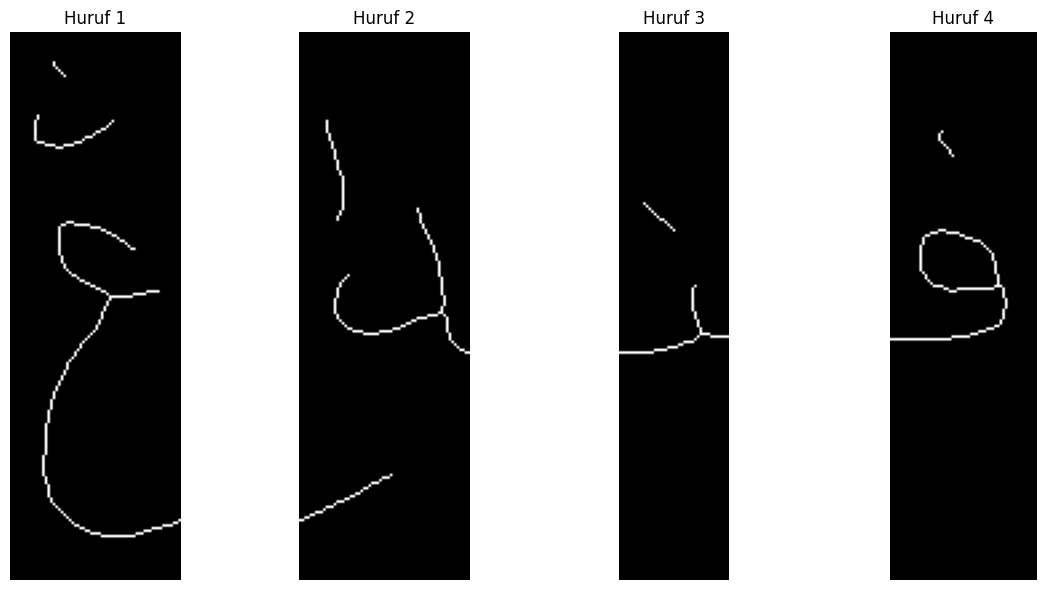

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# == Ambil lembah dari proyeksi vertikal ==
# Cari minimum lokal dengan membalik sinyal proyeksi
valleys, _ = find_peaks(-vertical_projection, prominence=8, distance=40)

# == Gunakan lembah sebagai titik potong ==
batas_potong = valleys

# == Potong gambar berdasarkan titik-titik potong ==
huruf_terpotong = []
start = 0
for batas in batas_potong:
    huruf = skeleton[:, start:batas]
    huruf_terpotong.append(huruf)
    start = batas

# Tambahkan bagian terakhir
huruf_terpotong.append(skeleton[:, start:])

# == Visualisasi hasil pemotongan ==
plt.figure(figsize=(15, 6))
for i, huruf in enumerate(huruf_terpotong[:5]):  # tampilkan hanya 5 huruf pertama
    plt.subplot(1, 5, i+1)
    plt.imshow(huruf, cmap="gray")
    plt.title(f"Huruf {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()


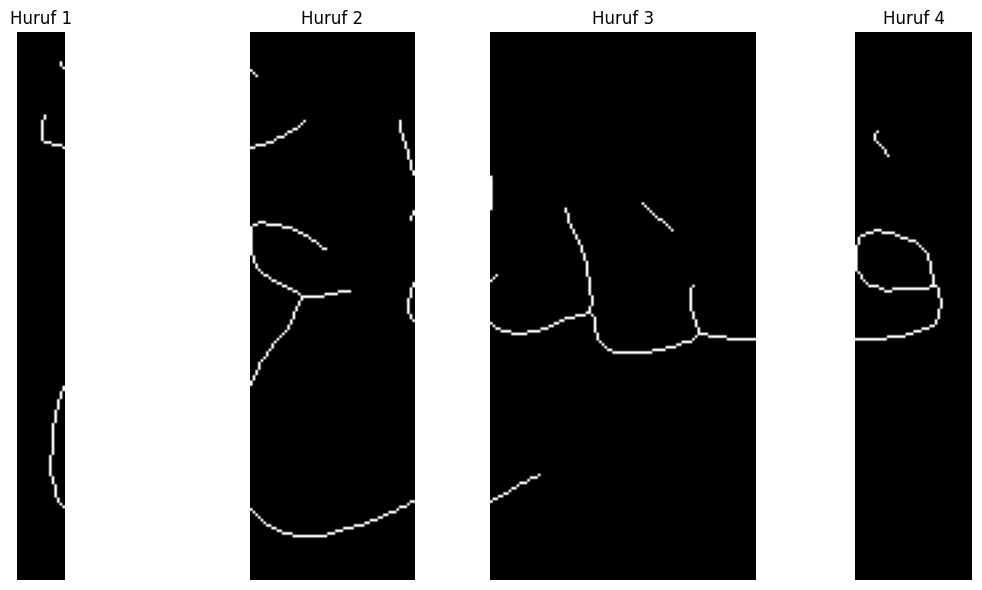

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# == Ambil puncak dari proyeksi vertikal ==
peaks, _ = find_peaks(vertical_projection, prominence=8, distance=40)

# == Gunakan langsung puncak sebagai titik potong ==
batas_potong = peaks

# == Potong gambar berdasarkan titik-titik potong ==
huruf_terpotong = []
start = 0
for batas in batas_potong:
    huruf = skeleton[:, start:batas]
    huruf_terpotong.append(huruf)
    start = batas

# Tambahkan bagian terakhir
huruf_terpotong.append(skeleton[:, start:])

# == Visualisasi hasil pemotongan ==
plt.figure(figsize=(15, 6))
for i, huruf in enumerate(huruf_terpotong[:5]):  # tampilkan hanya 5 huruf pertama
    plt.subplot(1, 5, i+1)
    plt.imshow(huruf, cmap="gray")
    plt.title(f"Huruf {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()


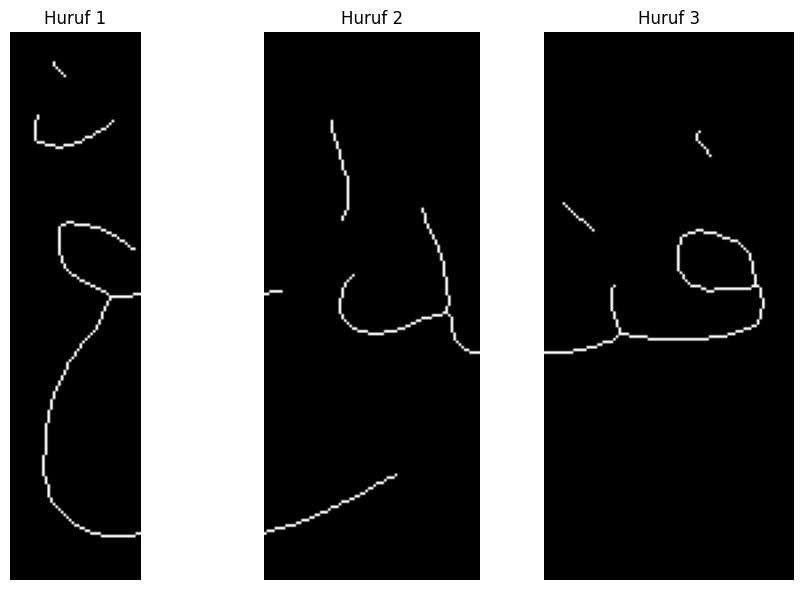

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# == Ambil puncak dari proyeksi vertikal ==
peaks, _ = find_peaks(vertical_projection, prominence=8, distance=40)

# == Tentukan titik potong sebagai titik tengah antar puncak ==
batas_potong = []
for i in range(len(peaks)-1):
    midpoint = (peaks[i] + peaks[i+1]) // 2
    batas_potong.append(midpoint)

# == Potong gambar berdasarkan titik-titik potong ==
huruf_terpotong = []
start = 0
for batas in batas_potong:
    huruf = skeleton[:, start:batas]
    huruf_terpotong.append(huruf)
    start = batas

# Tambahkan bagian terakhir
huruf_terpotong.append(skeleton[:, start:])

# == Visualisasi hasil pemotongan ==
plt.figure(figsize=(15, 6))
for i, huruf in enumerate(huruf_terpotong[:5]):  # tampilkan hanya 5 huruf pertama
    plt.subplot(1, 5, i+1)
    plt.imshow(huruf, cmap="gray")
    plt.title(f"Huruf {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Saving contoh.jpeg to contoh.jpeg


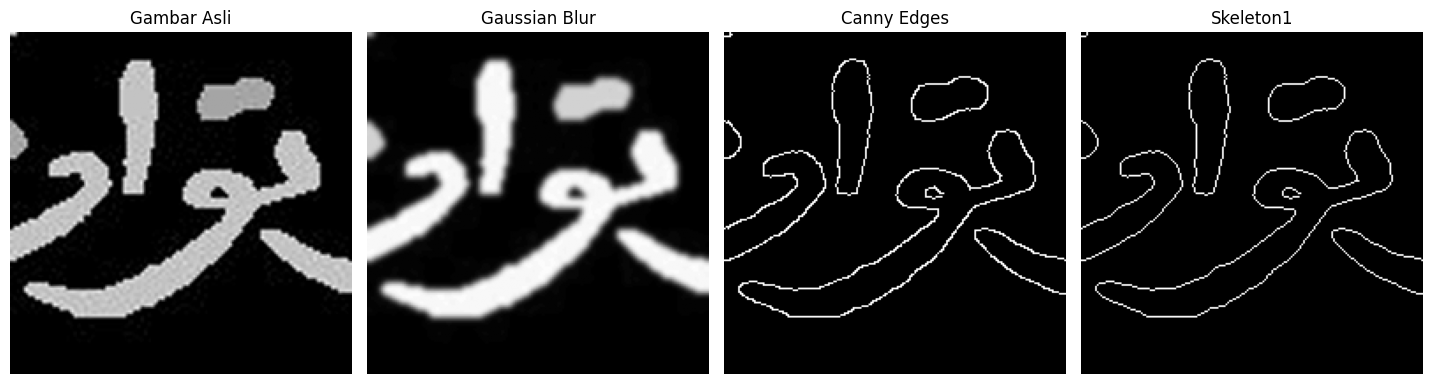

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os # Baris ini ditambahkan
from skimage.morphology import skeletonize

from google.colab import files
uploaded = files.upload()

# === 1. Load Gambar ===
image_path = "contoh.jpeg"  # Sesuaikan dengan path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Periksa apakah gambar berhasil dibaca
if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Resize Gambar (Opsional) ===
image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2), interpolation=cv2.INTER_CUBIC)

# === 3. Preprocessing ===
blurred = cv2.GaussianBlur(image, (9, 9), 0)

# === 4. Canny Edge Detection ===
edges = cv2.Canny(blurred, threshold1=50, threshold2=10)

# === 5. Konversi ke Biner ===
_, binary = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)

# === 6. Skeletonization ===
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)


# === 8. Tampilkan Hasil ===
plt.figure(figsize=(18, 5))
plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton1")
plt.axis("off")

plt.tight_layout()
plt.show()


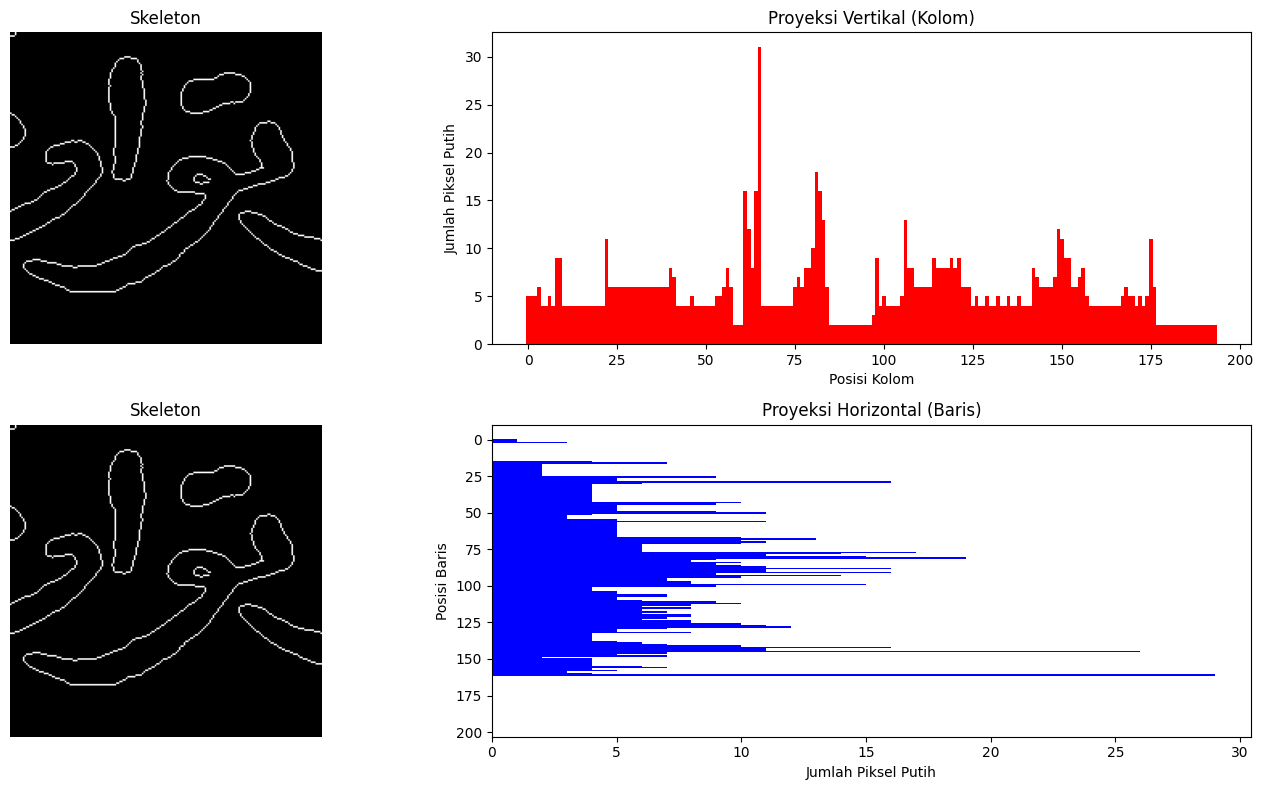

In [ ]:
# ===== HISTOGRAM PROYEKSI =====
# Hitung proyeksi vertikal (jumlah piksel putih per kolom)
vertical_projection = np.sum(skeleton == 255, axis=0)

# Hitung proyeksi horizontal (jumlah piksel putih per baris)
horizontal_projection = np.sum(skeleton== 255, axis=1)

# ===== VISUALISASI HISTOGRAM =====
plt.figure(figsize=(15, 8))

# Subplot 1: Skeleton + Proyeksi Vertikal
plt.subplot(2, 2, 1)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.bar(range(len(vertical_projection)), vertical_projection, width=1.0, color='red')
plt.title("Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Subplot 3: Skeleton + Proyeksi Horizontal
plt.subplot(2, 2, 3)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.barh(range(len(horizontal_projection)), horizontal_projection, height=1.0, color='blue')
plt.title("Proyeksi Horizontal (Baris)")
plt.xlabel("Jumlah Piksel Putih")
plt.ylabel("Posisi Baris")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

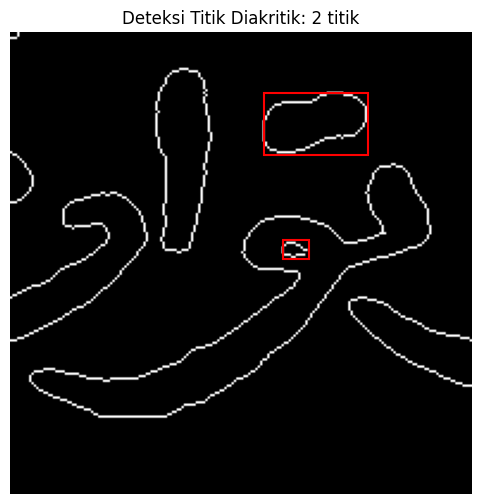

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage.measure import label, regionprops

# === 1. Load dan Preprocess Gambar ===
image_path = "contoh.jpeg"  # Ganti dengan nama file kamu
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Gambar tidak ditemukan!")

# Resize agar lebih besar (opsional)
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)

# Gaussian Blur dan Canny
blurred = cv2.GaussianBlur(image, (9, 9), 0)
edges = cv2.Canny(blurred, 50, 10)
_, binary = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)

# Skeletonize
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# === 2. Deteksi Baseline dari Histogram Proyeksi Horizontal ===
horizontal_hist = np.sum(binary == 255, axis=1)
baseline_row = np.argmax(horizontal_hist)

# === 3. Label Komponen dan Ambil yang Di Atas Baseline ===
labeled = label(binary > 0)
mask_above_baseline = np.zeros_like(labeled)

for region in regionprops(labeled):
    minr, minc, maxr, maxc = region.bbox
    if maxr < baseline_row:  # Posisi benar-benar di atas baseline
        mask_above_baseline[minr:maxr, minc:maxc] = labeled[minr:maxr, minc:maxc]

# === 4. Filter Titik Berdasarkan Ukuran dan Bentuk ===
filtered_dots = []
for region in regionprops(label(mask_above_baseline)):
    area = region.area
    minr, minc, maxr, maxc = region.bbox
    aspect_ratio = (maxc - minc + 1e-5) / (maxr - minr + 1e-5)

    # Ciri khas titik: area kecil & agak bulat
    if 10 < area < 150 and 0.5 < aspect_ratio < 2.0:
        filtered_dots.append(region.bbox)

# === 5. Visualisasi ===
plt.figure(figsize=(6, 6))
plt.imshow(skeleton, cmap='gray')
for bbox in filtered_dots:
    minr, minc, maxr, maxc = bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         edgecolor='red', facecolor='none', linewidth=1.5)
    plt.gca().add_patch(rect)

plt.title(f"Deteksi Titik Diakritik: {len(filtered_dots)} titik")
plt.axis("off")
plt.show()


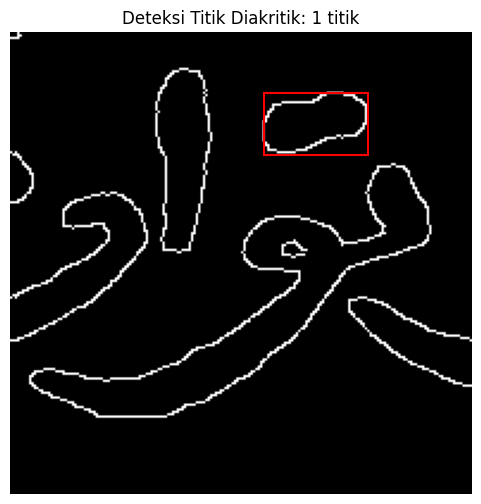

In [ ]:
# === 4. Filter Titik Berdasarkan Ukuran, Bentuk, dan Kepadatan (extent) ===
filtered_dots = []
for region in regionprops(label(mask_above_baseline)):
    area = region.area
    minr, minc, maxr, maxc = region.bbox
    width = maxc - minc
    height = maxr - minr
    aspect_ratio = width / (height + 1e-5)
    bbox_area = width * height
    extent = area / (bbox_area + 1e-5)  # seberapa padat isi bounding box

    # Filter lebih ketat: bulat, padat, kecil
    # Pastikan kondisi if berada di indentasi yang benar
    if 30 < area < 150 and 0.5 < aspect_ratio < 2.6:
        filtered_dots.append(region.bbox) # Indentasi ini sekarang benar di dalam if


# === 5. Visualisasi pada citra binary (bukan skeleton) ===
plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap='gray')  # Ganti dari skeleton ke binary
for bbox in filtered_dots:
    minr, minc, maxr, maxc = bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         edgecolor='red', facecolor='none', linewidth=1.5)
    plt.gca().add_patch(rect)

plt.title(f"Deteksi Titik Diakritik: {len(filtered_dots)} titik")
plt.axis("off")
plt.show()

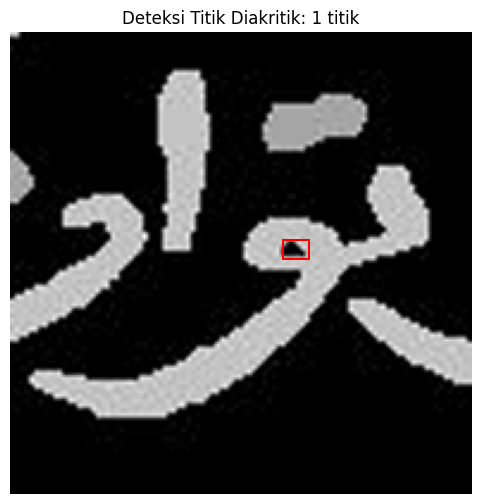

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# === 1. Load dan Preprocess Gambar ===
image_path = "contoh.jpeg"  # Ganti sesuai nama file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Gambar tidak ditemukan!")

# Perbesar ukuran gambar agar lebih detail
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)

# Blur & Canny Edge Detection
blurred = cv2.GaussianBlur(image, (9, 9), 0)
edges = cv2.Canny(blurred, 50, 10)

# Threshold ke bentuk biner
_, binary = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)

# === 2. Deteksi Baseline dari Histogram Proyeksi Horizontal ===
horizontal_hist = np.sum(binary == 255, axis=1)
baseline_row = np.argmax(horizontal_hist)

# === 3. Label komponen dan ambil yang di atas baseline ===
labeled = label(binary > 0)
mask_above_baseline = np.zeros_like(labeled)

for region in regionprops(labeled):
    minr, minc, maxr, maxc = region.bbox
    if maxr < baseline_row:  # Hanya komponen di atas garis dasar
        mask_above_baseline[minr:maxr, minc:maxc] = labeled[minr:maxr, minc:maxc]

# === 4. Filter khusus titik diakritik ===
filtered_dots = []
for region in regionprops(label(mask_above_baseline)):
    area = region.area
    minr, minc, maxr, maxc = region.bbox
    height = maxr - minr
    width = maxc - minc
    aspect_ratio = width / (height + 1e-5)

    # Ciri khas titik: kecil, bulat, dan pendek
    if 20 < area < 100 and 0.7 < aspect_ratio < 1.5 and height < 20:
        filtered_dots.append(region.bbox)

# === 5. Visualisasi ===
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')  # Tampilkan gambar asli

for bbox in filtered_dots:
    minr, minc, maxr, maxc = bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         edgecolor='red', facecolor='none', linewidth=1.5)
    plt.gca().add_patch(rect)

plt.title(f"Deteksi Titik Diakritik: {len(filtered_dots)} titik")
plt.axis("off")
plt.show()
